# anndata format of ST file

In [1]:
import anndata

In [2]:
adata = anndata.read('../ST_dataset/pdac/pdac_sc_st.h5ad')
adata

AnnData object with n_obs × n_vars = 4290 × 19738
    obsm: 'meta'

In [3]:
adata.to_df()  # cell name as index; gene name as column

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
C0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
C3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
C4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C4285,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0
C4286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C4287,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
C4288,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
adata.obsm['meta']  # cell name as index; "x","y": cell coordinates; "cell_type": cell type records

,x,y,cell_type
C0,9.880965,9.983122,Acinar_cells
C1,9.837614,9.552757,Cancer_clone_A
C2,10.306923,10.394713,Ductal_
C3,9.944901,9.741142,Ductal_
C4,9.772729,9.757684,Ductal_
...,...,...,...
C4285,8.908588,33.073034,Ductal_
C4286,8.930819,32.910415,Ductal_
C4287,8.856593,33.171411,Endothelial_cells
C4288,9.184347,32.938167,Endothelial_cells


# Distance distribution of LRIs

In [1]:
import os
import anndata
import pandas as pd
import numpy as np
from scipy.spatial import distance_matrix
from joblib import Parallel, delayed
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt
from utils import get_all_pair_distance, get_distance, plot_all_lrpair

In [3]:
dataset = 'pdac'
st_file = '../ST_dataset/pdac/pdac_sc_st.h5ad'
cci_file = '../tmp/pdac/cyto/cci_result.pkl'
print(dataset, st_file, cci_file, sep='\n')

pdac
../ST_dataset/pdac/pdac_sc_st.h5ad
../tmp/job1/cyto/cci_result.pkl


## Calculate distance distribution

In [8]:
# adata = anndata.read(st_file)
# adata.X = np.where(adata.X > adata.X.mean(axis=0), 1., 0.)  # threshold the expression to {0, 1} according to the average expression of all cells
# meta = adata.obsm['meta']
# coord = meta[['x', 'y']]
# cell_distance_matrix = pd.DataFrame(distance_matrix(coord, coord), columns=meta.index, index=meta.index)
#
# # load lr_score from ST filtering
# content = pd.read_pickle(cci_file)
# lr_score = content['lr_score']
# if dataset in ['starmap', 'seqfish_ob']:
#     score = 0.7
# else:
#     score = 0.8
# lr_score = lr_score.query(f'score > {score}')
# if 'pair_distance' in content.keys():
#     pair_info = content['pair_distance']
# else:
#     pair_info = content['cell_pair']
#
# df_lrdb = lr_score.query('type == "LRDB"').reset_index(drop=True)
# df_novel = lr_score.query('type != "LRDB"').reset_index(drop=True)
#
# # perform greater test
# def once(row):
#     ligand, receptor, sender, receiver = row
#     d1 = get_all_pair_distance(adata=adata, ligand=ligand, receptor=receptor,
#                                cell_distance_matrix=cell_distance_matrix)
#     d2 = get_distance(adata=adata, ligand=ligand, receptor=receptor, sender=sender, receiver=receiver,
#                       pair_info=pair_info, cell_distance_matrix=cell_distance_matrix)
#     if len(d1) > num_threshold:
#         np.random.seed(42)
#         d1 = np.random.choice(d1, size=num_threshold, replace=False)
#     if len(d2) > num_threshold:
#         np.random.seed(42)
#         d2 = np.random.choice(d2, size=num_threshold, replace=False)
#     p_value = mannwhitneyu(d1, d2, alternative='greater')[1]
#     return list(row) + [d1.mean(), d2.mean(), np.median(d1), np.median(d2), p_value]
#
#
# n_jobs = 5
# num_threshold = 100000
# col1 = ['ligand', 'receptor', 'cell_sender', 'cell_receiver']
# lrdb_output = Parallel(n_jobs=n_jobs)(delayed(once)(row) for row in df_lrdb[col1].values)
# novel_output = Parallel(n_jobs=n_jobs)(delayed(once)(row) for row in df_novel[col1].values)
#
# col2 = ['all_pair_mean', 'sender_receiver_pair_mean', 'all_pair_median', 'sender_receiver_pair_median',
#         'p_value']
# lrdb_output = pd.DataFrame(lrdb_output, columns=col1 + col2)
# novel_output = pd.DataFrame(novel_output, columns=col1 + col2)
#
# df_lrdb = df_lrdb.merge(lrdb_output, on=col1)
# df_novel = df_novel.merge(novel_output, on=col1)
#
# # save
# df_lrdb.to_csv('./{}_df_lrdb.csv'.format(dataset), index=False)
# df_novel.to_csv('./{}_df_novel.csv'.format(dataset), index=False)

## Directly load and plot

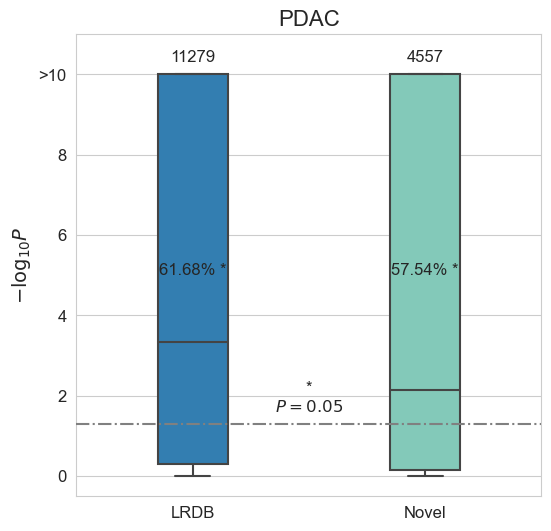

In [9]:
# load the results from previous cells
df_lrdb = pd.read_csv('./{}_df_lrdb.csv'.format(dataset))
df_novel = pd.read_csv('./{}_df_novel.csv'.format(dataset))

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

dataset = 'pdac'
title = 'PDAC'

plot_all_lrpair(df_lrdb, df_novel, ax, title, threshold=10)

# Plot spatial distribution

In [4]:
import os
import anndata
import pandas as pd
import numpy as np
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
from utils import plot_lrpair_vln, plot_lrpair_spatial

In [5]:
def load_data(st_file, cci_file):
    #
    adata = anndata.read(st_file)
    adata.X = np.where(adata.X > adata.X.mean(axis=0), 1., 0.)
    meta = adata.obsm['meta']
    coord = meta[['x', 'y']]
    cell_distance_matrix = pd.DataFrame(distance_matrix(coord, coord), columns=meta.index, index=meta.index)

    #
    content = pd.read_pickle(cci_file)
    pair_info = content["pair_distance"]

    return adata, cell_distance_matrix, pair_info

dataset = 'pdac'
st_file = '../ST_dataset/pdac/pdac_sc_st.h5ad'
cci_file = '../tmp/pdac/cyto/cci_result.pkl'
adata, cell_distance_matrix, pair_info = load_data(st_file, cci_file)

WNT10A FZD5 Cancer_clone_B Cancer_clone_A


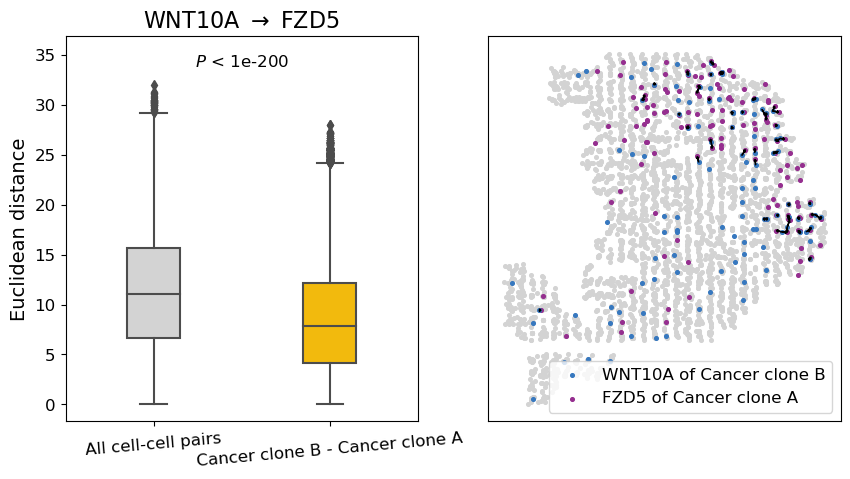

In [8]:
ligand = 'WNT10A'
receptor = 'FZD5'
sender = 'Cancer_clone_B'
receiver = 'Cancer_clone_A'
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes[0]
plot_lrpair_vln(adata, cell_distance_matrix, pair_info, ligand, receptor, sender, receiver, ax)
ax = axes[1]
plot_lrpair_spatial(adata, pair_info, ligand, receptor, sender, receiver, ax)

PRELP ITGB4 Fibroblasts Cancer_clone_A


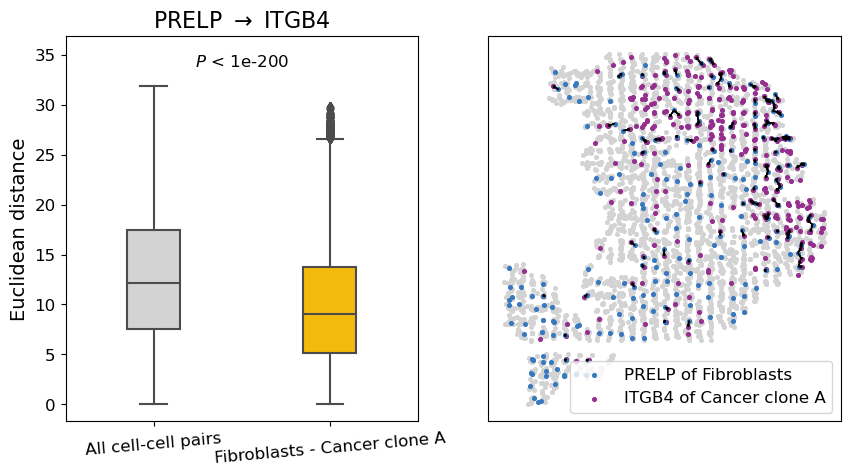

In [9]:
ligand = 'PRELP'
receptor = 'ITGB4'
sender = 'Fibroblasts'
receiver = 'Cancer_clone_A'
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes[0]
plot_lrpair_vln(adata, cell_distance_matrix, pair_info, ligand, receptor, sender, receiver, ax)
ax = axes[1]
plot_lrpair_spatial(adata, pair_info, ligand, receptor, sender, receiver, ax)

YBX1 FGFR1 Cancer_clone_B Fibroblasts


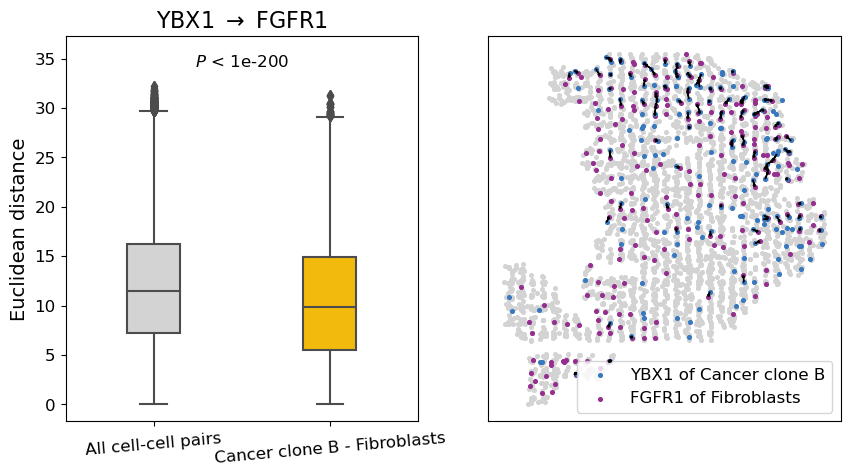

In [11]:
ligand = 'YBX1'
receptor = 'FGFR1'
sender = 'Cancer_clone_B'
receiver = 'Fibroblasts'
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes[0]
plot_lrpair_vln(adata, cell_distance_matrix, pair_info, ligand, receptor, sender, receiver, ax)
ax = axes[1]
plot_lrpair_spatial(adata, pair_info, ligand, receptor, sender, receiver, ax)

HLA-B CLEC7A Cancer_clone_A mDCs_B


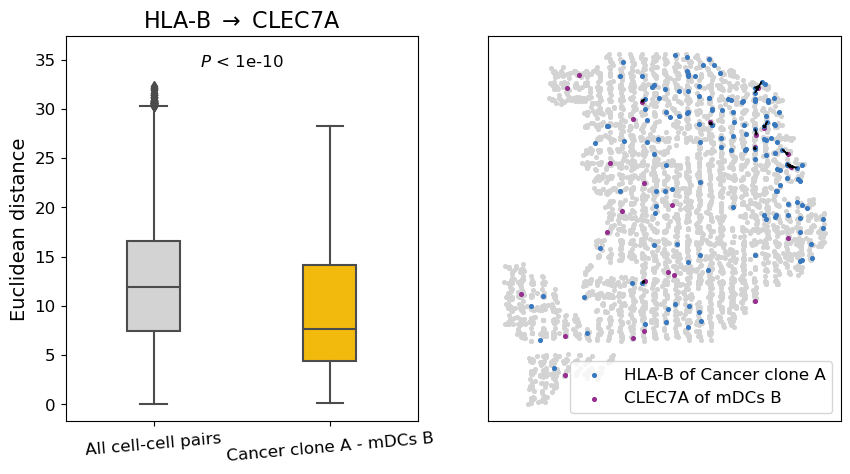

In [12]:
ligand = 'HLA-B'
receptor = 'CLEC7A'
sender = 'Cancer_clone_A'
receiver = 'mDCs_B'
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes[0]
plot_lrpair_vln(adata, cell_distance_matrix, pair_info, ligand, receptor, sender, receiver, ax)
ax = axes[1]
plot_lrpair_spatial(adata, pair_info, ligand, receptor, sender, receiver, ax)